In [204]:
import pandas as pd

In [205]:
df = pd.read_csv('employee_retention_data.csv')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [8]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [9]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [138]:
df = df[~df.seniority.isin([98,99])]

In [18]:
company1 = df[df['company_id']==1]
company1['dept'].unique()

array(['sales', 'marketing', 'data_science', 'customer_service',
       'engineer', 'design'], dtype=object)

In [31]:
df['join_date'][1]

'2013-04-29'

In [34]:
fullinfo = pd.DataFrame(date_generated, columns=['date'])

In [37]:
l=[]
for i in range(1802):
    l.append(-1)
fullinfo['c1_hc']=l
fullinfo['c2_hc']=l
fullinfo['c3_hc']=l
fullinfo['c4_hc']=l
fullinfo['c5_hc']=l
fullinfo['c6_hc']=l
fullinfo['c7_hc']=l
fullinfo['c8_hc']=l
fullinfo['c9_hc']=l
fullinfo['c10_hc']=l
fullinfo['c11_hc']=l
fullinfo['c12_hc']=l

from datetime import datetime

d=[{}]
for i in range (1,13):
    d.append({})
for i in range (1,13):
    temp = df[df['company_id']==i]
    temp = temp.fillna('2106-01-01')
    column = 'c'+str(i)+'_hc'
    for index, row in temp.iterrows():
        temp.at[index, 'join_date'] =  datetime.strptime(row['join_date'], '%Y-%m-%d')
        temp.at[index, 'quit_date'] =  datetime.strptime(row['quit_date'], '%Y-%m-%d')
    join = sorted(temp['join_date'].tolist())
    quit = sorted(temp['quit_date'].tolist())
    djoin={}
    dquit={}
    for j in range(len(join)):
        djoin[join[j]] = j+1
    for j in range(len(quit)):
        dquit[quit[j]] = j+1
    start=0
    end=0
    startnum = 0
    endnum=0
    for index, row in fullinfo.iterrows():
        for x in range(start,len(join)):
            if join[x] <= row['date']:
                startnum = djoin[join[x]]
                start = djoin[join[x]]-1
            else :
                break
        for x in range(end,len(quit)):
            if quit[x] <= row['date']:
                endnum = dquit[quit[x]]
                end = dquit[quit[x]]-1
            else:
                break        
        fullinfo.at[index, column] = startnum-endnum
        



In [102]:
fullinfo.to_csv('fullinfo.csv')

In [139]:
for index, row in df.iterrows():
    df.at[index, 'join_date'] = datetime.datetime.strptime(row['join_date'], '%Y-%m-%d')
    if not pd.isnull(row['quit_date']):
        df.at[index, 'quit_date'] = datetime.datetime.strptime(row['quit_date'], '%Y-%m-%d')
    


In [179]:
quitdf = df.dropna()
l=[]
for i in range(quitdf.shape[0]):
    l.append(-1.0)
quitdf['duration']=l
quitdf['quitsenirority']=l
for index, row in quitdf.iterrows():
        d = (row['quit_date'] - row['join_date']).days
        quitdf.at[index, 'duration'] = float(d)
        quitdf.at[index, 'quitsenirority'] = int(d/365 + row['seniority'])
        
        

/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [180]:
quitdf.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority
0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0
1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0
4,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0
5,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0


In [181]:
quitdf.to_csv('quitdf.csv')

In [183]:
notquitdf = df[pd.isnull(df['quit_date'])]

In [185]:
l=[]
for i in range(notquitdf.shape[0]):
    l.append(-1)
notquitdf['age']=l
for index, row in notquitdf.iterrows():
    notquitdf.at[index, 'age'] = (datetime.datetime.strptime('2016-01-01', '%Y-%m-%d') - row['join_date']).days/365 + row['seniority']

/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [202]:
temp = notquitdf.groupby(['age']).agg(['count'])['employee_id']
temp.to_csv('employee_age.csv')

In [211]:
l=[]
for i in range(df.shape[0]):
    l.append(-1.0)
df['quitratio'] = l
df['quitornot'] = l
for index, row in df.iterrows():
    if pd.isnull(row['quit_date']):
        df.at[index, 'quitornot'] = 1
    else:
        df.at[index, 'quitornot'] = 0
for index, row in df.iterrows():
    if index%100==0:
        print(index)
    temp = df[df['salary']==row['salary']]
    quit = temp[temp['quitornot']==0].shape[0]
    notquit = temp[temp['quitornot']==1].shape[0]
    df.at[index,'quitratio' ] = quit/(quit+notquit)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [219]:
quitdf.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority
0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0
1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0
4,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0
5,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0


In [214]:
df.to_csv('row.csv')

In [216]:
temp = df[df['salary']==349000]
quit = temp[temp['quitornot']==0].shape[0]
notquit = temp[temp['quitornot']==1].shape[0]
print(quit)
print(notquit)         

2
1


In [154]:
class h2o_predict_proba_wrapper:
    # drf is the h2o distributed random forest object, the column_names is the
    # labels of the X values
    def __init__(self,model,column_names):
            
            self.model = model
            self.column_names = column_names
 
    def predict_proba(self,this_array):        
        # If we have just 1 row of data we need to reshape it
        shape_tuple = np.shape(this_array)        
        if len(shape_tuple) == 1:
            this_array = this_array.reshape(1, -1)
            
        # We convert the numpy array that Lime sends to a pandas dataframe and
        # convert the pandas dataframe to an h2o frame
        self.pandas_df = pd.DataFrame(data = this_array,columns = self.column_names)
        self.h2o_df = h2o.H2OFrame(self.pandas_df)
        
        # Predict with the h2o drf
        self.predictions = self.model.predict(self.h2o_df).as_data_frame()
        # the first column is the class labels, the rest are probabilities for
        # each class
        self.predictions = self.predictions.iloc[:,1:].as_matrix()
        return self.predictions

In [153]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.model import H2OBinomialModel
h2o.init()
from __future__ import print_function
import sklearn
import sklearn.datasets
import sklearn.ensemble
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_144"; Java(TM) SE Runtime Environment (build 1.8.0_144-b01); Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from /Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/fx/xf6ljx_d69b4jmszgdzqtrmm0000gn/T/tmpzqmo58a6
  JVM stdout: /var/folders/fx/xf6ljx_d69b4jmszgdzqtrmm0000gn/T/tmpzqmo58a6/h2o_yiyuanfeng_started_from_python.out
  JVM stderr: /var/folders/fx/xf6ljx_d69b4jmszgdzqtrmm0000gn/T/tmpzqmo58a6/h2o_yiyuanfeng_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,2 months and 21 days
H2O cluster name:,H2O_from_python_yiyuanfeng_b3lohz
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [170]:
result.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority,quithc,joinhc,quitratio_salary,salary_degree,increaseratio,earlyquit
0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0,532,522,0.566434,1,0.018797,0.0
1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0,523,467,0.540541,2,0.107075,1.0
2,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0,468,302,0.557252,1,0.354701,0.0
3,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0,1855,615,0.562500,3,0.668464,0.0
4,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0,747,431,0.674157,2,0.423025,0.0


In [175]:
l = [1,2,4,8,10,13,14]
data = result.iloc[:,l]

feature_names = ['company_id','dept', 'salary', 'quitsenirority','joinhc','increaseratio'] 

class_names = 'earlyquit'

labels = np.array(data.iloc[:,6])
# le= sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_

datacolumn=[0,1,2,3,4,5]
data = np.array(data.iloc[:,datacolumn]) # no label no name for column
categorical_features = [0,1]
categorical_names = ['company_id','dept'  ]
categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_
data = data.astype(float)

encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=categorical_features)



train, test, labels_train, labels_test = train_test_split(data, labels, train_size=0.70)


train_h2o_df = h2o.H2OFrame(train)
train_h2o_df.set_names(feature_names)
train_h2o_df['earlyquit'] = h2o.H2OFrame(labels_train).asfactor()


test_h2o_df = h2o.H2OFrame(test)
test_h2o_df.set_names(feature_names)
test_h2o_df['earlyquit'] = h2o.H2OFrame(labels_test).asfactor()



for feature in categorical_features:
    train_h2o_df[feature] = train_h2o_df[feature].asfactor()
    test_h2o_df[feature] = test_h2o_df[feature].asfactor()
    

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [176]:
earlyquit_drf = H2ORandomForestEstimator(
        model_id="earlyquit",
        ntrees=100,
        #stopping_rounds=2,
        score_each_iteration=True,
        #seed=1000000,
        balance_classes=False,
        histogram_type="AUTO")

earlyquit_drf.train(x=feature_names,
         y='earlyquit',
         training_frame=train_h2o_df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [177]:
earlyquit_drf.coef_norm


Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  earlyquit


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.13589099330974966
RMSE: 0.3686339557199657
LogLoss: 0.4214422052035174
Mean Per-Class Error: 0.22138444118018707
AUC: 0.8529473169897163
Gini: 0.7058946339794325
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2976885370430895: 


,0,1,Error,Rate
0,5279.0,1550.0,0.227,(1550.0/6829.0)
1,579.0,2047.0,0.2205,(579.0/2626.0)
Total,5858.0,3597.0,0.2252,(2129.0/9455.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2976885,0.6578821,233.0
max f2,0.1772021,0.7634463,292.0
max f0point5,0.4734299,0.6456831,157.0
max accuracy,0.4579123,0.8014807,163.0
max precision,1.0,1.0,0.0
max recall,0.0000299,1.0,399.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.2976885,0.5097347,233.0
max min_per_class_accuracy,0.3000560,0.7741983,232.0
max mean_per_class_accuracy,0.2756877,0.7786156,244.0


Gains/Lift Table: Avg response rate: 27.77 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100476,0.8987707,3.3352307,3.3352307,0.9263158,0.9263158,0.0335110,0.0335110,233.5230689,233.5230689
,2,0.0200952,0.8528000,3.0320279,3.1836293,0.8421053,0.8842105,0.0304646,0.0639756,203.2027899,218.3629294
,3,0.0300370,0.8198576,3.0259800,3.1314496,0.8404255,0.8697183,0.0300838,0.0940594,202.5979971,213.1449589
,4,0.0400846,0.7886789,3.0699282,3.1160287,0.8526316,0.8654354,0.0308454,0.1249048,206.9928248,211.6028672
,5,0.0500264,0.7605911,2.6429445,3.0220120,0.7340426,0.8393235,0.0262757,0.1511805,164.2944532,202.2011951
,6,0.1000529,0.6469890,2.5348362,2.7784241,0.7040169,0.7716702,0.1268088,0.2779893,153.4836221,177.8424086
,7,0.1500793,0.5661247,2.3293090,2.6287190,0.6469345,0.7300916,0.1165270,0.3945164,132.9308960,162.8719044
,8,0.2,0.4931115,2.0977682,2.4961919,0.5826271,0.6932840,0.1047220,0.4992384,109.7768243,149.6191927
,9,0.3000529,0.3779138,1.7355635,2.2425598,0.4820296,0.6228410,0.1736481,0.6728865,73.5563538,124.2559761
,10,0.4,0.2800498,1.2878097,2.0039985,0.3576720,0.5565838,0.1287129,0.8015994,28.7809733,100.3998477



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-08-15 10:19:02,0.027 sec,0.0,nan,nan,nan,nan,nan
,2018-08-15 10:19:02,0.064 sec,1.0,0.4878037,7.3774073,0.6878394,1.9622677,0.2454041
,2018-08-15 10:19:02,0.079 sec,2.0,0.4809682,6.7272395,0.6971310,2.0294489,0.2664544
,2018-08-15 10:19:02,0.093 sec,3.0,0.4696354,5.8345217,0.7075053,2.0254914,0.2779557
,2018-08-15 10:19:02,0.107 sec,4.0,0.4554570,5.0154060,0.7227406,2.0939943,0.2862630
---,---,---,---,---,---,---,---,---
,2018-08-15 10:19:05,3.002 sec,96.0,0.3684935,0.4211733,0.8531339,3.2973303,0.2206240
,2018-08-15 10:19:05,3.023 sec,97.0,0.3685989,0.4213700,0.8529888,3.2973303,0.2247488
,2018-08-15 10:19:05,3.043 sec,98.0,0.3685721,0.4212335,0.8531227,3.3379943,0.2259122
,2018-08-15 10:19:05,3.067 sec,99.0,0.3686116,0.4213646,0.8529720,3.3379943,0.2286621



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
increaseratio,36590.6992188,1.0,0.3351655
joinhc,23720.9570312,0.6482783,0.2172806
quitsenirority,17292.6679688,0.4725974,0.1583984
salary,15514.4550781,0.4240000,0.1421102
company_id,9253.1904297,0.2528837,0.0847579
dept,6800.0478516,0.1858409,0.0622875


<bound method ModelBase.coef_norm of >

In [158]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
callmodel = H2OAutoEncoderEstimator( 
        activation="Tanh", 
        hidden=[50], 
        l1=1e-5,
        score_interval=0,
        epochs=100
)

callmodel.train(x=feature_names,y='duration', training_frame=train_h2o_df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [159]:
callmodel

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1534259891163_1


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 2.7165792317264547e-05
RMSE: 0.005212081380529716
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2018-08-14 11:27:50,0.258 sec,0.00000 obs/sec,0.0,0,0.0,0.4192507,0.1757711
,2018-08-14 11:27:52,1.612 sec,73011 obs/sec,10.0,1,94550.0,0.0080048,0.0000641
,2018-08-14 11:27:53,2.851 sec,75428 obs/sec,20.0,2,189100.0,0.0097929,0.0000959
,2018-08-14 11:27:54,3.994 sec,78226 obs/sec,30.0,3,283650.0,0.0095017,0.0000903
,2018-08-14 11:27:55,5.102 sec,80212 obs/sec,40.0,4,378200.0,0.0077570,0.0000602
,2018-08-14 11:27:56,6.299 sec,80331 obs/sec,50.0,5,472750.0,0.0085976,0.0000739
,2018-08-14 11:27:58,7.410 sec,81321 obs/sec,60.0,6,567300.0,0.0066135,0.0000437
,2018-08-14 11:27:59,8.587 sec,81428 obs/sec,70.0,7,661850.0,0.0064530,0.0000416
,2018-08-14 11:28:00,9.645 sec,82567 obs/sec,80.0,8,756400.0,0.0081256,0.0000660
,2018-08-14 11:28:01,10.700 sec,83500 obs/sec,90.0,9,850950.0,0.0052121,0.0000272


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
dept.2,1.0,1.0,0.1296155
dept.4,0.9631760,0.9631760,0.1248425
dept.5,0.8992181,0.8992181,0.1165526
dept.3,0.8828821,0.8828821,0.1144352
dept.1,0.8665587,0.8665587,0.1123194
dept.0,0.7090779,0.7090779,0.0919075
joinhc,0.6016435,0.6016435,0.0779823
increaseratio,0.4966054,0.4966054,0.0643677
duration,0.3980340,0.3980340,0.0515914
quithc,0.3637177,0.3637177,0.0471434


In [2]:
import pandas as pd
companyhc = pd.read_csv('fullinfo.csv')
df = pd.read_csv('quitdf.csv')

In [6]:
companyhc.head()

,Unnamed: 0,date,c1_hc,c2_hc,c3_hc,c4_hc,c5_hc,c6_hc,c7_hc,c8_hc,c9_hc,c10_hc,c11_hc,c12_hc
0,0,2011-01-24,25,17,9,12,5,3,1,6,3,0,0,0
1,1,2011-01-25,27,19,10,12,5,3,1,6,3,0,0,0
2,2,2011-01-26,29,19,12,13,6,3,1,6,3,0,0,0
3,3,2011-01-27,29,19,12,13,6,3,1,6,3,0,0,0
4,4,2011-01-28,29,19,12,13,6,3,1,6,3,0,0,0


In [19]:
df.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority,quithc,joinhc
0,0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0,532,522
1,1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0,523,467
2,3,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0,468,302
3,4,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0,1855,615
4,5,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0,747,431


In [18]:
from datetime import datetime

l=[]
for i in range(df.shape[0]):
    l.append(-1)
df['quithc'] = l
df['joinhc'] = l
for index, row in df.iterrows():
    joinday = (datetime.strptime(row['join_date'], '%Y-%m-%d %H:%M:%S' ) - datetime.strptime('2011-01-24', '%Y-%m-%d' )).days
    quitday = (datetime.strptime(row['quit_date'], '%Y-%m-%d %H:%M:%S' ) - datetime.strptime('2011-01-24', '%Y-%m-%d' )).days
    company = 'c'+str(row['company_id'])+'_hc'
    df.at[index, 'joinhc']= companyhc.at[joinday, company]
    df.at[index, 'quithc'] = companyhc.at[quitday, company]
    
    

In [13]:
from datetime import datetime
(datetime.strptime('2014-03-24 00:00:00', '%Y-%m-%d %H:%M:%S' ) - datetime.strptime('2011-01-24', '%Y-%m-%d' )).days

1155

In [22]:
quitornot = pd.read_csv('row.csv')
quitornot.head()
quitornot=quitornot.rename(columns = {'quitratio':'quitratio_salary'})

In [24]:
quitornot.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quitratio_salary,quitornot
0,0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0.566434,0.0
1,1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0.540541,0.0
2,2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,0.513158,1.0
3,3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0.557252,0.0
4,4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0.562500,0.0


In [29]:
result = pd.merge(df,
                 quitornot[['employee_id', 'company_id','quitratio_salary']],how='left',
                 on=['employee_id','company_id'])
result.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority,quithc,joinhc,quitratio_salary
0,0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0,532,522,0.566434
1,1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0,523,467,0.540541
2,3,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0,468,302,0.557252
3,4,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0,1855,615,0.562500
4,5,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0,747,431,0.674157


In [63]:
l = []
for i in range (result.shape[0]):
    l.append(-1)
result['salary_degree']=l
result['dept_code']=l
dept = {'customer_service':1, 'data_science':2, 'design' :3, 'engineer':4, 'marketing':5, 'sales':6 }
for index,row in result.iterrows():
    if row['salary']<=88000:
        result.at[index, 'salary_degree'] = 0
    elif row['salary']<=144000 and row['salary']>88000:
        result.at[index, 'salary_degree'] = 1
    elif row['salary']>144000 and row['salary']<=210000:
        result.at[index, 'salary_degree'] = 2
    elif row['salary']>210000 and row['salary']<=300000:
        result.at[index, 'salary_degree'] = 3
    elif row['salary']>30000 :
        result.at[index, 'salary_degree'] = 4
    result.at[index, 'dept_code'] = dept[row['dept']]

In [66]:
result.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority,quithc,joinhc,quitratio_salary,salary_degree,dept_code
0,0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0,532,522,0.566434,1,1
1,1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0,523,467,0.540541,2,5
2,3,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0,468,302,0.557252,1,1
3,4,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0,1855,615,0.562500,3,2
4,5,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0,747,431,0.674157,2,2


In [104]:
import numpy as np
from kmodes.kprototypes import KPrototypes
result = result.drop(['category'],axis =1)
result1 = result[result['company_id']==1]
# stocks with their market caps, sectors and countries
l=[3,4,5,8,10]
X = np.array(result1.iloc[:,l])
l=[1]
s= X[:,l]
scaler = MinMaxScaler()
scaler.fit(s)
X[:,l] = scaler.transform(s)

kproto = KPrototypes(n_clusters=5, n_init=10, verbose=2)
clusters = kproto.fit_predict(X, categorical=[0, 1])

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

category=[]
for s, c in zip(X, clusters):
    category.append(c)

/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1041, ncost: 1367891305944.198
Run: 1, iteration: 2/100, moves: 277, ncost: 1321416216991.9211
Run: 1, iteration: 3/100, moves: 105, ncost: 1310855699712.1301
Run: 1, iteration: 4/100, moves: 76, ncost: 1305743865790.0608
Run: 1, iteration: 5/100, moves: 38, ncost: 1304198828856.3862
Run: 1, iteration: 6/100, moves: 23, ncost: 1303624017165.8794
Run: 1, iteration: 7/100, moves: 0, ncost: 1303624017165.8794
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1381, ncost: 1630898762844.671
Run: 2, iteration: 2/100, moves: 342, ncost: 1225239615950.3499
Run: 2, iteration: 3/100, moves: 41, ncost: 1216848070133.849
Run: 2, iteration: 4/100, moves: 0, ncost: 1216848070133.849
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, i

In [74]:
result.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority,quithc,joinhc,quitratio_salary,salary_degree,dept_code,category
0,0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0,532,522,0.566434,1,1,1
1,1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0,523,467,0.540541,2,5,1
2,3,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0,468,302,0.557252,1,1,1
3,4,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0,1855,615,0.562500,3,2,2
4,5,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0,747,431,0.674157,2,2,1


In [140]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
result1 = result[result['company_id']==1]
l=[5,10,11]
s= result1.iloc[:,l]
scaler = MinMaxScaler()
scaler.fit(s)
scaled_data = scaler.transform(s)
scaled_df = pd.DataFrame(scaled_data, columns=s.columns)

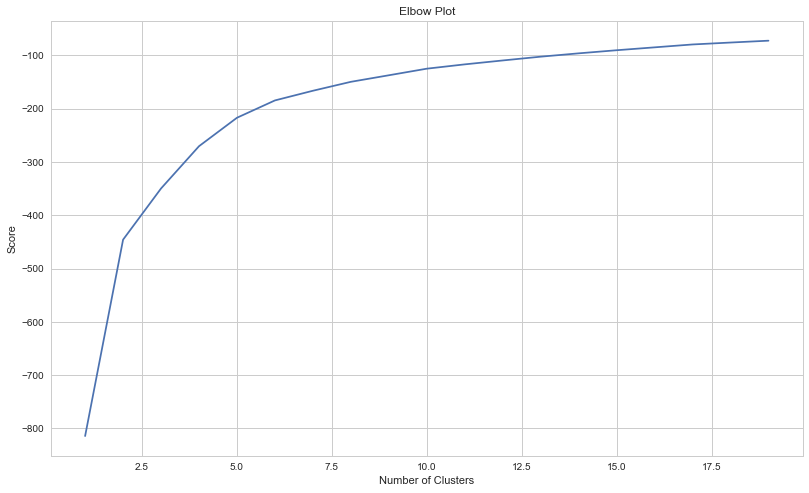

In [135]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
from sklearn import metrics
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))]

plt.figure(figsize=(12,8))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Plot')


In [141]:
#scaled_df = scaled_df.drop(['category'], axis = 1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)
scaled_df['category'] = kmeans.labels_

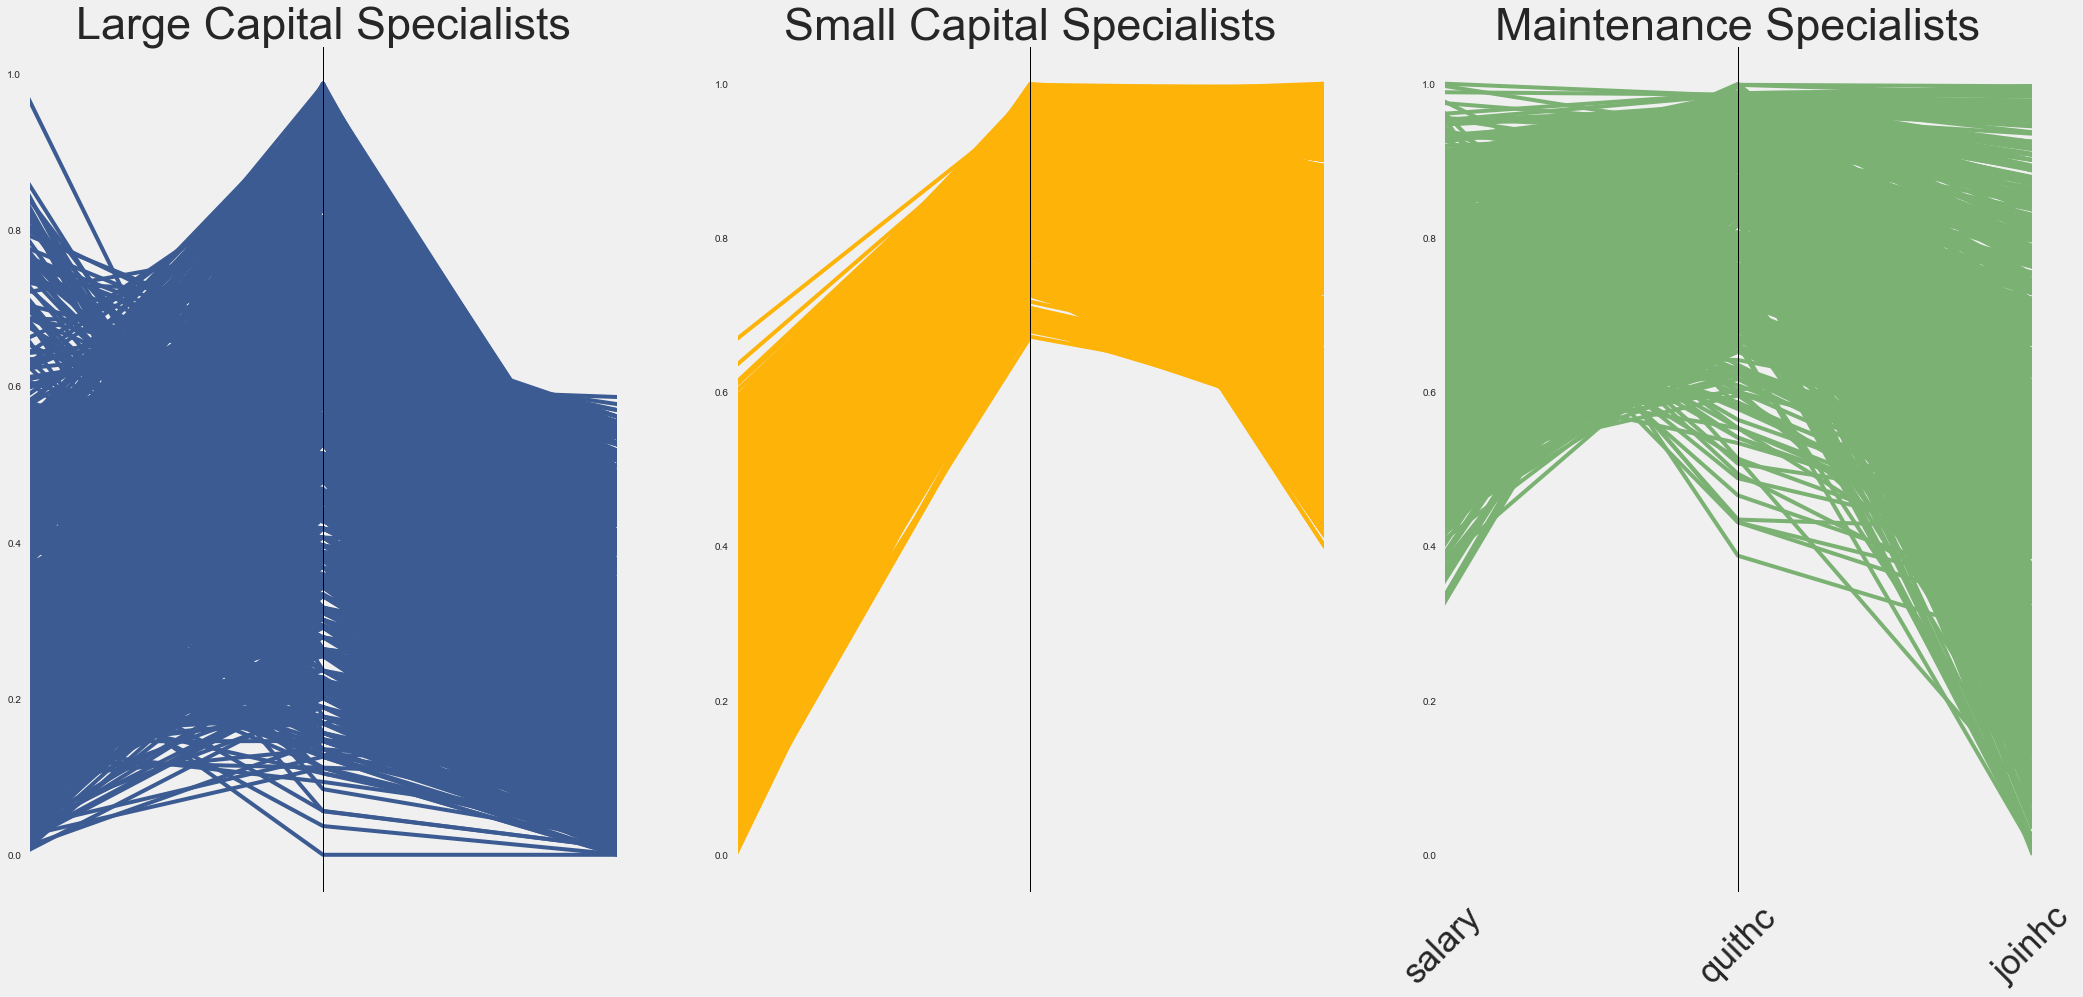

In [143]:
#scaled_df = scaled_df.drop(['clusters'],axis = 1)
# ind = []
# for index, row in result1.iterrows():
#     if index%3==0:
#         ind.append(index)
# l=[15,4,5,14,8,10]
# t = result1.iloc[:,l]
# scaler.fit(t.iloc[1:,1:])
# t.iloc[1:,1:] = scaler.transform(t.iloc[1:,1:])

# t = t.iloc[1:]
t = scaled_df
plt.figure(figsize=(32, 32))
plt.style.use('fivethirtyeight')
cc = ["denim blue", "amber", "greyish", "faded green", "dusty purple", "pale red"]
c = sns.xkcd_palette(cc)

# CLUSTER = 0
plt.subplot(231)
parallel_coordinates(t[t['category']==0], 'category',color=sns.xkcd_palette(["denim blue"]))
#plt.title("Small Cap Specialists w/ Large Cap + \n Relocation Experience (Cluster = 0)")
plt.title("Large Capital Specialists",fontsize=45)
plt.xticks([])
plt.legend([])


# CLUSTER = 1
plt.subplot(232)
parallel_coordinates(t[t['category']==1], 'category',color=sns.xkcd_palette(["amber"]))
plt.title("Small Capital Specialists",fontsize=45)
plt.xticks([])
plt.legend([])


# CLUSTER = 2
plt.subplot(233)
parallel_coordinates(t[t['category']==2], 'category',color=sns.xkcd_palette(["faded green"]))
plt.title("Maintenance Specialists",fontsize=45)
plt.xticks(rotation=45,fontsize=35)
plt.legend([])


# # CLUSTER = 3
# plt.subplot(234)
# parallel_coordinates(t[t['category']==0], 'category',color=sns.xkcd_palette(["greyish"]))
# plt.title("Generalists",fontsize=45)
# plt.xticks(rotation=45,fontsize=35)
# plt.legend([])

# plt.subplot(235)
# parallel_coordinates(t[t['category']==4], 'category',color=sns.xkcd_palette(["greyish"]))
# plt.title("Generalists",fontsize=45)
# plt.xticks(rotation=45,fontsize=35)
# plt.legend([])

# plt.subplot(236)
# parallel_coordinates(t[t['category']==5], 'category',color=sns.xkcd_palette(["greyish"]))
# plt.title("Generalists",fontsize=45)
# plt.xticks(rotation=45,fontsize=35)
# plt.legend([])


# plt.savefig('clusterplot.png', format='png', dpi=1000)


In [147]:
l = []
for i in range (result.shape[0]):
    l.append(-1.0)
result['increaseratio']= l
for index, row in result.iterrows():
    result.at[index, 'increaseratio'] = (row['quithc']-row['joinhc'])/row['quithc']

In [151]:
result.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quitsenirority,quithc,joinhc,quitratio_salary,salary_degree,increaseratio
0,13021.0,7,customer_service,28,89000.0,2014-03-24 00:00:00,2015-10-30 00:00:00,585.0,29.0,532,522,0.566434,1,0.018797
1,825355.0,7,marketing,20,183000.0,2013-04-29 00:00:00,2014-04-04 00:00:00,340.0,20.0,523,467,0.540541,2,0.107075
2,662910.0,7,customer_service,20,115000.0,2012-05-14 00:00:00,2013-06-07 00:00:00,389.0,21.0,468,302,0.557252,1,0.354701
3,256971.0,2,data_science,23,276000.0,2011-10-17 00:00:00,2014-08-22 00:00:00,1040.0,25.0,1855,615,0.562500,3,0.668464
4,509529.0,4,data_science,14,165000.0,2012-01-30 00:00:00,2013-08-30 00:00:00,578.0,15.0,747,431,0.674157,2,0.423025


In [150]:
result = result.drop(['Unnamed: 0', 'dept_code'], axis = 1)

In [160]:
result.to_csv('quitdf.csv')

In [167]:
result['quit_date'][result['increaseratio']<0 ].unique()

array(['2015-09-04 00:00:00', '2014-07-18 00:00:00',
       '2015-11-27 00:00:00', '2015-10-02 00:00:00',
       '2015-07-06 00:00:00', '2015-11-20 00:00:00',
       '2015-07-31 00:00:00', '2015-09-18 00:00:00',
       '2015-10-23 00:00:00', '2015-10-09 00:00:00',
       '2015-08-21 00:00:00', '2015-12-04 00:00:00',
       '2015-06-19 00:00:00', '2015-11-13 00:00:00',
       '2015-10-30 00:00:00', '2015-11-06 00:00:00',
       '2015-06-26 00:00:00', '2015-06-12 00:00:00',
       '2014-08-15 00:00:00', '2015-05-08 00:00:00',
       '2015-11-12 00:00:00', '2015-07-10 00:00:00',
       '2015-05-22 00:00:00', '2015-05-01 00:00:00',
       '2015-05-29 00:00:00', '2015-09-25 00:00:00',
       '2015-01-28 00:00:00', '2015-08-07 00:00:00',
       '2015-07-17 00:00:00', '2015-04-10 00:00:00',
       '2015-09-11 00:00:00', '2015-08-04 00:00:00',
       '2015-10-16 00:00:00', '2015-05-15 00:00:00',
       '2014-10-10 00:00:00', '2015-08-14 00:00:00',
       '2015-01-30 00:00:00', '2015-06-11 00:0

In [169]:
l = []
for i in range (result.shape[0]):
    l.append(-1.0)
result['earlyquit']= l
for index, row in result.iterrows():
    if row['duration']>365:
        result.at[index,'earlyquit'] = 0
    else:
        result.at[index,'earlyquit'] = 1



In [178]:
df = pd.read_csv('employee_retention_data.csv')
df = df.dropna()

In [180]:
df['earlyquit'] = range(df.shape[0])
for index, row in df.iterrows():
    if (datetime.strptime(row['quit_date'], '%Y-%m-%d') - datetime.strptime(row['join_date'], '%Y-%m-%d')).days > 396:
        df.at[index, 'earlyquit'] = 0
    else:
        df.at[index, 'earlyquit'] = 1
df['earlyquit'].unique()

array([0, 1])

In [190]:
col = df['salary']
minval = col.min()
maxval = col.max()
diff = maxval-minval
cutpoints=[]
for i in range(1,50):
    cutpoints.append(0.02*i*diff+minval)
break_points = [minval] + cutpoints + [maxval]


labels = range(len(cutpoints)+1)


colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)







#print pd.value_counts(data["LoanAmount_Bin"], sort=False)


In [193]:
df['S'] = colBin
df.to_csv('test.csv')

In [194]:
df['S'].unique()

[9, 22, 13, 35, 20, ..., 48, 47, 38, 46, 45]
Length: 50
Categories (50, int64): [0 < 1 < 2 < 3 ... 46 < 47 < 48 < 49]

In [195]:
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,earlyquit,S
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0,9
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,22
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,13
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0,35
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,0,20
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,0,19
10,892155.0,6,customer_service,13,72000.0,2012-11-12,2015-02-27,0,7
12,939058.0,1,marketing,1,48000.0,2012-12-10,2013-11-15,1,4
13,163427.0,10,marketing,23,154000.0,2012-06-18,2015-09-25,0,18
14,461248.0,2,sales,20,201000.0,2013-09-16,2014-08-22,1,25
